In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import sklearn
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import scipy.stats as stats

In [2]:
data=pd.read_csv('C:/Users/Asus/Downloads/assignment/crop3.csv',delimiter=',')
data.head()

,Domain Code,Domain,Area Code (FAO),Area,Element Code,Element,Item Code (FAO),Item,Year Code,Year,Unit,Value,Flag,Flag Description
0,QCL,Crops and livestock products,16,Bangladesh,5312,Area harvested,486,Bananas,1961,1961,ha,33600.0,NaN,Official data
1,QCL,Crops and livestock products,16,Bangladesh,5312,Area harvested,486,Bananas,1962,1962,ha,34800.0,NaN,Official data
2,QCL,Crops and livestock products,16,Bangladesh,5312,Area harvested,486,Bananas,1963,1963,ha,34000.0,NaN,Official data
3,QCL,Crops and livestock products,16,Bangladesh,5312,Area harvested,486,Bananas,1964,1964,ha,36000.0,NaN,Official data
4,QCL,Crops and livestock products,16,Bangladesh,5312,Area harvested,486,Bananas,1965,1965,ha,40500.0,NaN,Official data


In [8]:
grouped = data.groupby(data.Element)
df_production = grouped.get_group("Production")
df_production = df_production.rename(columns={"Area":"Country","Value": "Production", "Item":"Crop"})
df_production = df_production[["Year","Country","Crop","Production"]]
df_production

,Year,Country,Crop,Production
60,1961,Bangladesh,Bananas,446000.0
61,1962,Bangladesh,Bananas,512100.0
62,1963,Bangladesh,Bananas,469400.0
63,1964,Bangladesh,Bananas,571100.0
64,1965,Bangladesh,Bananas,619800.0
...,...,...,...,...
9675,2016,Viet Nam,"Vegetables, fresh nes",13815107.0
9676,2017,Viet Nam,"Vegetables, fresh nes",14236489.0
9677,2018,Viet Nam,"Vegetables, fresh nes",14879631.0
9678,2019,Viet Nam,"Vegetables, fresh nes",15120123.0


In [29]:
df_production.isnull().sum()

Year           0
Country        0
Crop           0
Production    42
dtype: int64

In [30]:
df_production = df_production.dropna()

In [31]:
df_production.isnull().sum()

Year          0
Country       0
Crop          0
Production    0
dtype: int64

In [32]:
df_production['Production'] = df_production['Production'].astype(np.int64)

C:\Users\Asus\AppData\Local\Temp/ipykernel_24448/651180945.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_production['Production'] = df_production['Production'].astype(np.int64)


In [33]:
df_production.groupby(['Country'],sort=True)['Production'].sum().nlargest(10)

Country
China          32724823842
India          27932397629
Indonesia       6202241819
Thailand        5315983545
Pakistan        3929426227
Philippines     3592734910
Viet Nam        2748042124
Bangladesh      2536104101
Myanmar         1510056468
Bhutan            10335788
Name: Production, dtype: int64

In [34]:
df_production.groupby(['Crop','Country'],sort=True)['Production'].sum().nlargest(20)

Crop                   Country    
Sugar cane             India          13522065366
Rice, paddy            China           9768144888
Maize                  China           6400117296
Rice, paddy            India           6389184042
Wheat                  China           4889338551
Vegetables, fresh nes  China           4644076707
Sugar cane             China           3846903534
Wheat                  India           3191242530
Potatoes               China           2723489457
Sugar cane             Thailand        2567018478
                       Pakistan        2420322464
Rice, paddy            Indonesia       2380997281
                       Bangladesh      1802818825
Sugar cane             Philippines     1484989922
Vegetables, fresh nes  India           1425453179
Rice, paddy            Viet Nam        1419350776
Sugar cane             Indonesia       1323144787
Rice, paddy            Thailand        1320165789
Potatoes               India           1175781600
Rice, paddy    

In [36]:
grouped = data.groupby(data.Element)
df_area = grouped.get_group("Area harvested")
df_area = df_area.rename(columns={"Area":"Country","Value": "Area_ha"})
df_area = df_area[["Year","Country","Area_ha"]]
df_area = df_production.merge(df_area, on=['Year','Country'])
df_area

,Year,Country,Crop,Production,Area_ha
0,1961,Bangladesh,Bananas,446000,33600.0
1,1961,Bangladesh,Bananas,446000,17800.0
2,1961,Bangladesh,Bananas,446000,8903.0
3,1961,Bangladesh,Bananas,446000,55847.0
4,1961,Bangladesh,Bananas,446000,8483516.0
...,...,...,...,...,...
39140,2020,Viet Nam,"Vegetables, fresh nes",15449739,939563.0
39141,2020,Viet Nam,"Vegetables, fresh nes",15449739,18804.0
39142,2020,Viet Nam,"Vegetables, fresh nes",15449739,7222618.0
39143,2020,Viet Nam,"Vegetables, fresh nes",15449739,185435.0


Text(0.5, 1.0, 'Country wise Crop production')

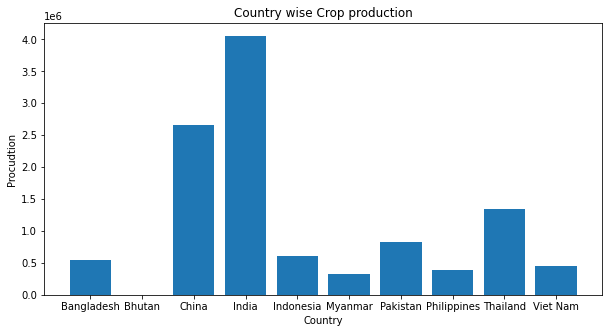

In [48]:
plt.figure(figsize=(10,5))
plt.bar(df_area.Country, df_area.Production/10**2)
plt.xlabel('Country')
plt.ylabel('Procudtion')
plt.title('Country wise Crop production')